**Gradient:** 
$$ \nabla f(x,y,z) = \begin{pmatrix}\frac{\partial}{\partial x}f(x,y,z)\\\frac{\partial}{\partial y}f(x,y,z)\\\frac{\partial}{\partial z}f(x,y,z)\end{pmatrix}$$

**Curl:**
$$\nabla\times \vec{g}(x,y,z) = \begin{pmatrix}
\frac{\partial}{\partial y}g_z(x,y,z) - \frac{\partial}{\partial z}g_y(x,y,z)\\
\frac{\partial}{\partial z}g_x(x,y,z) - \frac{\partial}{\partial x}g_z(x,y,z)\\
\frac{\partial}{\partial x}g_y(x,y,z) - \frac{\partial}{\partial y}g_x(x,y,z)\\
\end{pmatrix}$$

**Divergence:**
$$\nabla\cdot \vec{g}(x,y,z) = \frac{\partial}{\partial x}g_x(x,y,z)+\frac{\partial}{\partial y}g_y(x,y,z)+\frac{\partial}{\partial z}g_z(x,y,z)$$

Lets take our Test function as,
$$
f(x,y) = \exp(-x^2-y^4)
$$
And our test vector as
$$
\vec{g}(\vec{r})=\frac{\vec{r}}{r}=\begin{pmatrix}x/\sqrt{x^2+y^2+z^2}\\y/\sqrt{x^2+y^2+z^2}\\z/\sqrt{x^2+y^2+z^2}\end{pmatrix}
$$

# Another way to see curl:
- I have been  searching for the defenition of curl extensively for a long period, all i got way "It says how the vector is swirlng around a point" and that doesnt make any sense until now,
- I randomly found a video in youtube said "[Vector Calculus: Understanding Curl](https://youtu.be/A2Sn_xAKMwQ)", it made me thinking for a day and finlly i made a numerical computation to see if its true or just its another boring Curl video.
The core definition for the curl is:
$$(\nabla \times \mathbf F)\cdot \hat n
=
\lim_{\Delta A \to 0}
\frac{1}{\Delta A}
\oint_{\partial (\Delta A)} \mathbf F \cdot d\boldsymbol{\ell}$$
By this, we can intiutively arrive to the Greens theorem,
$$\oint_{\partial A} \mathbf F \cdot d\ell
=
\iint_A (\nabla \times \mathbf F)\cdot \hat{n}\, dA$$
When you sum the circulation of all tiny squares:

My visualization on the Green's theorem:
1. Every interior edge is walked twice
2. once forward, once backward
3. Those contributions cancel exactly
4. Only the boundary of the big region survives

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path1=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
path2=array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])
path3=array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])
path4=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
2.0001603532207795
Error percentage 0.008
([[np.float64(0.99999999999), np.float64(0.99999999999), 1.0], [np.float64(0.99999999999), np.float64(0.9999999999907143), 1.0], [np.float64(0.99999999999), np.float64(0.9999999999914285), 1.0], [np.float64(0.99999999999), np.float64(0.9999999999921428), 1.0], [np.float64(0.99999999999), np.float64(0.9999999999928572), 1.0], [np.float64(0.99999999999), np.float64(0.9999999999935715), 1.0], [np.float64(0.99999999999), np.float64(0.9999999999942857), 1.0], [np.float64(0.99999999999), np.float64(0.999999999995), 1.0], [np.float64(0.99999999999), np.float64(0.9999999999957143), 1.0], [np.float64(0.99999999999), np.float64(0.9999999999964285), 1.0], [np.float64(0.99999999999), np.float64(0.9999999999971428), 1.0]], [[

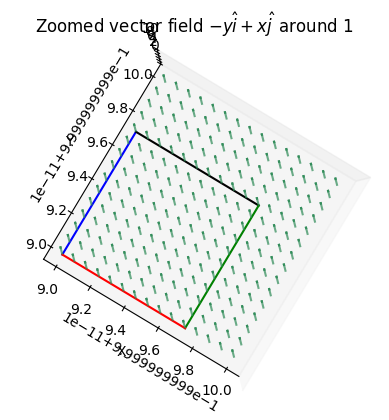

In [ ]:

num_points=15
d=1e-11
around=1
a=around-d
b=around
x=np.linspace(a,b,num_points)
y=np.linspace(a,b,num_points)
h=np.abs(x[0]-x[1])
z=1.0
def my_function_vector(x,y):
    r=1
    #r=np.sqrt(x**2 +y**2)*2
    vx=-y
    vy=x
    return vx/r, vy/r

def dA(ipos,finpos,x=x,y=y,f=my_function_vector,a=a,b=b,numpoints=num_points):
    if 0 <= ipos < num_points and 0 <= finpos < num_points:
        breath=np.abs(x[ipos]-x[finpos])
        length=np.abs(y[ipos]-y[finpos])
        return -1*length*breath
    else:
        raise("Wrong index")

def my_curl(f,x,y,h=1e-5):
    fyx=(f(x+h,y)[1]-f(x-h,y)[1])/(2*h)
    fxy=(f(x,y+h)[0]-f(x,y-h)[0])/(2*h)
    cz=fyx-fxy
    return cz

def numerical_curl(dA=dA,ipos=0,finpos=10,h=h):
    small_area=dA(ipos,finpos)
    def workdone(funcion=my_function_vector,ipos=ipos,finpos=finpos,h=h):
        path1=funcion(x[ipos]*np.ones(shape=np.shape(y[ipos:finpos])),y[ipos:finpos])[1]
        work_path1=sum(path1)*h
        path2=funcion(x[ipos:finpos],y[finpos]*np.ones(shape=np.shape(x[ipos:finpos])),)[0]
        work_path2=sum(path2)*h
        path3=-1*(funcion(x[finpos]*np.ones(shape=np.shape(y[ipos:finpos])),y[ipos:finpos])[1])
        work_path3=sum(path3)*h
        path4=-1*(funcion(x[ipos:finpos],y[ipos]*np.ones(shape=np.shape(x[ipos:finpos])))[0])
        work_path4=sum(path4)*h
        totalwork=(work_path1+work_path2+work_path3+work_path4)
        print(f"{path1=}\n{path2=}\n{path3=}\n{path4=}")
        return totalwork
    return workdone()/small_area

def path_trace(x=x,y=y,z=z,h=h,ipos=0,finpos=10):
    path1=[[x[ipos],y[i],z] for i in range (ipos,finpos+1)]
    path2=[[ x[i],y[finpos],z] for i in range (ipos,finpos+1)]
    path3=[[ x[finpos],y[i],z] for i in range (finpos,ipos-1,-1)]
    path4=[[ x[i],y[ipos],z] for i in range (finpos,ipos-1,-1)]
    return path1,path2,path3,path4

# x_mesh,y_mesh,z_mesh =np.meshgrid(x,y,z)
curl_val= numerical_curl(h=h)
print(curl_val)
analytical_curl=2
error=np.abs(curl_val-analytical_curl)/analytical_curl*100
print(f"Error percentage {error :.2}")

print(path_trace())

x_mesh,y_mesh,z_mesh=np.meshgrid(x,y,z)
p1,p2,p3,p4 = path_trace()
p1=np.array(p1)
p2=np.array(p2)
p3=np.array(p3)
p4=np.array(p4)
fig=plt.figure()
ax_1=fig.add_subplot(projection="3d")
vx,vy=my_function_vector(x_mesh,y_mesh)
scale=3e-13
ax_1.quiver(x_mesh,y_mesh,z_mesh,vx*scale,vy*scale,0,color="seagreen",alpha=0.7)
ax_1.plot(p1[:,0],p1[:,1],p1[:,2],color="blue")
ax_1.plot(p2[:,0],p2[:,1],p2[:,2],color="black")
ax_1.plot(p3[:,0],p3[:,1],p3[:,2],color="green")
ax_1.plot(p4[:,0],p4[:,1],p4[:,2],color="red")
ax_1.view_init(elev=0)
ax_1.set_zlim(0,10)
ax_1.set_xlabel("X")
ax_1.set_ylabel("Y")
ax_1.grid(False)
ax_1.view_init(elev=90)
ax_1.set_title(f"Zoomed vector field $-y \\hat i+x\\hat j $ around {around} ")
plt.show()

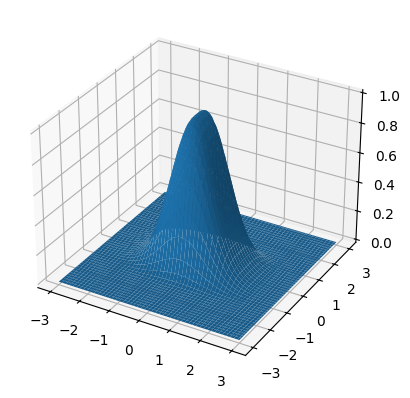

In [13]:
x=np.linspace(-3,3,100)
y=np.linspace(-3,3,100)
z=np.linspace(-3,3,100)
x,y=np.meshgrid(x,y)

def f(x,y):
    return np.exp(-x**2-y**4)
axes=plt.axes(projection="3d")
axes.plot_surface(x,y,f(x,y)) # type: ignore
plt.show()


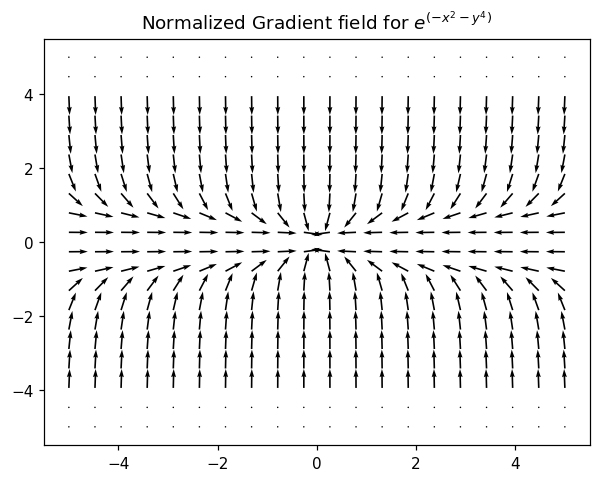

In [14]:
a=20
x=np.linspace(-5,5,a)
y=np.linspace(-5,5,a)
x,y=np.meshgrid(x,y)

def g(x,y,z):
    vector=np.array([x,y,z])
    normvector=vector/np.linalg.norm(vector)
    return normvector[0],normvector[1],normvector[2]

def gradient(x,y,f,h):
    gra=np.array([f(x+h,y)-f(x-h,y),f(x,y+h)-f(x,y-h)])/(2*h)
    norm=np.sqrt(gra[0]**2+gra[1]**2)
    norm[norm == 0] = 1
    return gra[0]/norm,gra[1]/norm
fig, ax = plt.subplots(dpi=110)

grax, gray=gradient(x,y,f,h=0.001)
ax.quiver(x,y,grax,gray)
ax.set_title("Normalized Gradient field for $e^{(-x^2-y^4)}$")
plt.show()

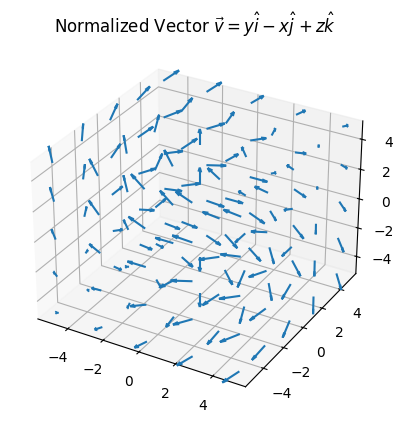

0.3849001794620221


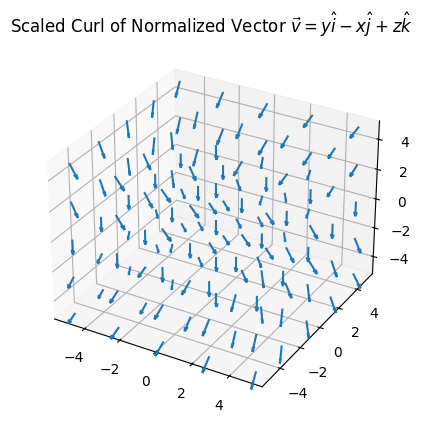

In [15]:
a=5
x=np.linspace(-5,5,a)
y=np.linspace(-5,5,a)
z=np.linspace(-5,5,a)
x,y,z=np.meshgrid(x,y,z)
def g(x,y,z):
    vector=np.array([y,-x,z])
    norm = np.sqrt((x)**2 + y**2 + z**2)
    if(isinstance(x,np.ndarray)):
        norm[norm == 0] = 1
    normvector=vector/norm
    return normvector[0],normvector[1],normvector[2]
def divergence(f,point,h=0.00001):
    x=point[0]
    y=point[1]
    z=point[2]
    dfdx=(f(x+h,y,z)[0]-f(x-h,y,z)[0])/(2*h)
    dfdy=(f(x,y+h,z)[1]-f(x,y-h,z)[1])/(2*h)
    dfdz=(f(x,y,z+h)[2]-f(x,y,z-h)[2])/(2*h)
    return dfdx+dfdy+dfdz
def curl(F, x, y, z, h=1e-4):
    Fx, Fy, Fz = F(x, y, z)
    dFz_dy = (F(x, y+h, z)[2] - F(x, y-h, z)[2])/(2*h)
    dFy_dz= (F(x, y, z+h)[1] - F(x, y, z-h)[1])/(2*h)
    dFx_dz= (F(x, y, z+h)[0] - F(x, y, z-h)[0])/(2*h)
    dFz_dx=(F(x+h, y, z)[2] - F(x-h, y, z)[2])/(2*h)
    dFy_dx= (F(x+h, y, z)[1] - F(x-h, y, z)[1])/(2*h)
    dFx_dy= (F(x, y+h, z)[0] - F(x, y-h, z)[0])/(2*h)
    curl_x= dFz_dy - dFy_dz
    curl_y= dFx_dz - dFz_dx
    curl_z= dFy_dx - dFx_dy
    norm=np.sqrt(curl_x**2+curl_y**2+curl_z**2)
    norm[norm == 0] = 1
    return curl_x/norm, curl_y/norm, curl_z/norm
ax=plt.axes(projection="3d")
u,v,w=g(x,y,z)
ax.quiver(x,y,z,u,v,w) # type: ignore
ax.set_title("Normalized Vector $\\vec v = y\\hat i-x\\hat j +z\\hat k$")
plt.show()
print(divergence(g,point=[1,1,1]))
ax=plt.axes(projection="3d")
u,v,w=curl(g,x,y,z)
ax.quiver(x,y,z,u,v,w) # type: ignore
ax.set_title("Scaled Curl of Normalized Vector $\\vec v = y\\hat i-x\\hat j +z\\hat k$")
plt.show()

